# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ось так можемо переглянути, які є листки в Excel файлі:

In [2]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '/Users/sofiapetrova/Desktop/СОФИЯ/Я КРАСОТКА/DATA SCIENCE/КУРС/Фінальний проект/Grocery Database.xlsx'

In [3]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [49]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/100 SGD Spent)
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [31]:
df = pd.read_excel(path_to_file)

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 100

В файлі ви знайдете самі дані та опис колонок.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

In [5]:
xl1 = xl.parse('Grosto DB')

In [196]:
display(xl1.head(), xl1.tail(), xl1.dtypes, xl1.shape)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Age Group
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,35-45
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,45-65
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,15-18
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,15-18
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,15-18


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Age Group
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,Woodlands,Singapore,Frozen,Frozen Meat,Minced Pork,Betagro,320 g,3.10,2,0.02,6.0760,74.1664,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580,18-35
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,Woodlands,Singapore,"Dairy, Chilled & Eggs",Deli & Cooked Meat,Straky Bacon,Citterio,240 g,5.44,2,0.03,10.5536,10.5536,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816,18-35
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,Woodlands,Singapore,Kitchen & Dining,BBQ Supplies,Swee! Disposable bamboo chopsticks,Swee!,203 per pack,3.97,1,0.01,3.9303,14.0184,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177,45-65
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,Woodlands,Singapore,Bakery & Breakfast,"Jams, Honey & Spreads",Squeezy organic honey,Adams,453g,4.10,1,0.01,4.0590,14.0184,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820,45-65
50446,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,42,62,Female,Woodlands,Singapore,Frozen,Ice Cream,Picard Nut ice cream,Picard,400 ml,6.09,1,0.01,6.0291,14.0184,0.07,14.999688,Card,BDO Unibank,0.107,0.15,0.743,0.65163,0.9135,4.52487,45-65


Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

(50447, 33)

In [69]:
xl1.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [73]:
xl1['Year'].unique()

array([2016, 2017, 2018, 2019])

In [92]:
print(sorted(xl1['Age'].unique()))

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


In [366]:
xl1['Country'].unique()

array(['Indonesia', 'Malaysia', 'Philippines', 'Singapore'], dtype=object)

In [111]:
xl1.groupby('Country')['City'].unique().apply(', '.join)

Country
Indonesia               Jakarta
Malaysia           Kuala Lumpur
Philippines              Manila
Singapore      Bedok, Woodlands
Name: City, dtype: object

In [114]:
xl1['Category'].unique()

array(['Choco, Snacks, Sweets', 'Wines, Beers & Spirits',
       'Fruit & Vegetable', 'Pet Care', 'Meat & Seafood', 'Mother & Baby',
       'Bakery & Breakfast', 'Household', 'Beverages', 'Beauty',
       'Dairy, Chilled & Eggs', 'Frozen', 'Kitchen & Dining',
       'Party Supplies', 'Rice & Cooking Essentials', 'Health'],
      dtype=object)

## Бізнес-питання

**1.** Люди якої вікової категорії є найчастішими покупцями?

In [17]:
xl1['Age Group'] = pd.cut(xl1['Age'], bins=[15, 18, 35, 45, 65, 75], labels=['15-18', '18-35', '35-45', '45-65', '65-75'])

In [12]:
most_frequent_age = xl1.pivot_table(index='Country', columns='Age Group', values='Receipt Number', aggfunc='nunique')

most_frequent_age

Age Group,15-18,18-35,35-45,45-65,65-75
Country,,,,,
Indonesia,197,850,548,686,72
Malaysia,323,1289,532,566,85
Philippines,272,1161,588,917,86
Singapore,397,1849,1047,1199,127


В усіх країнах присутня така тенденція, що найчастіше роблять покупки молоді люди віком 18-35, тож варто зробити акцент саме на їхню купівельну поведінку.

**2.** Які топ 5 категорій товарів серед молодих людей віком 18-35 в Сінгапурі?

In [40]:
filtered_singapore = xl1[(xl1['Age Group'] == '18-35') & (xl1['Country'] == 'Singapore')]

top_categories = filtered_singapore.groupby('Category')['Receipt Number'].count().reset_index()

top_5_categories = top_categories.sort_values(by='Receipt Number', ascending=False).head(5)

top_5_categories

,Category,Receipt Number
0,Bakery & Breakfast,894
5,Frozen,878
6,Fruit & Vegetable,730
1,Beauty,687
13,Pet Care,530


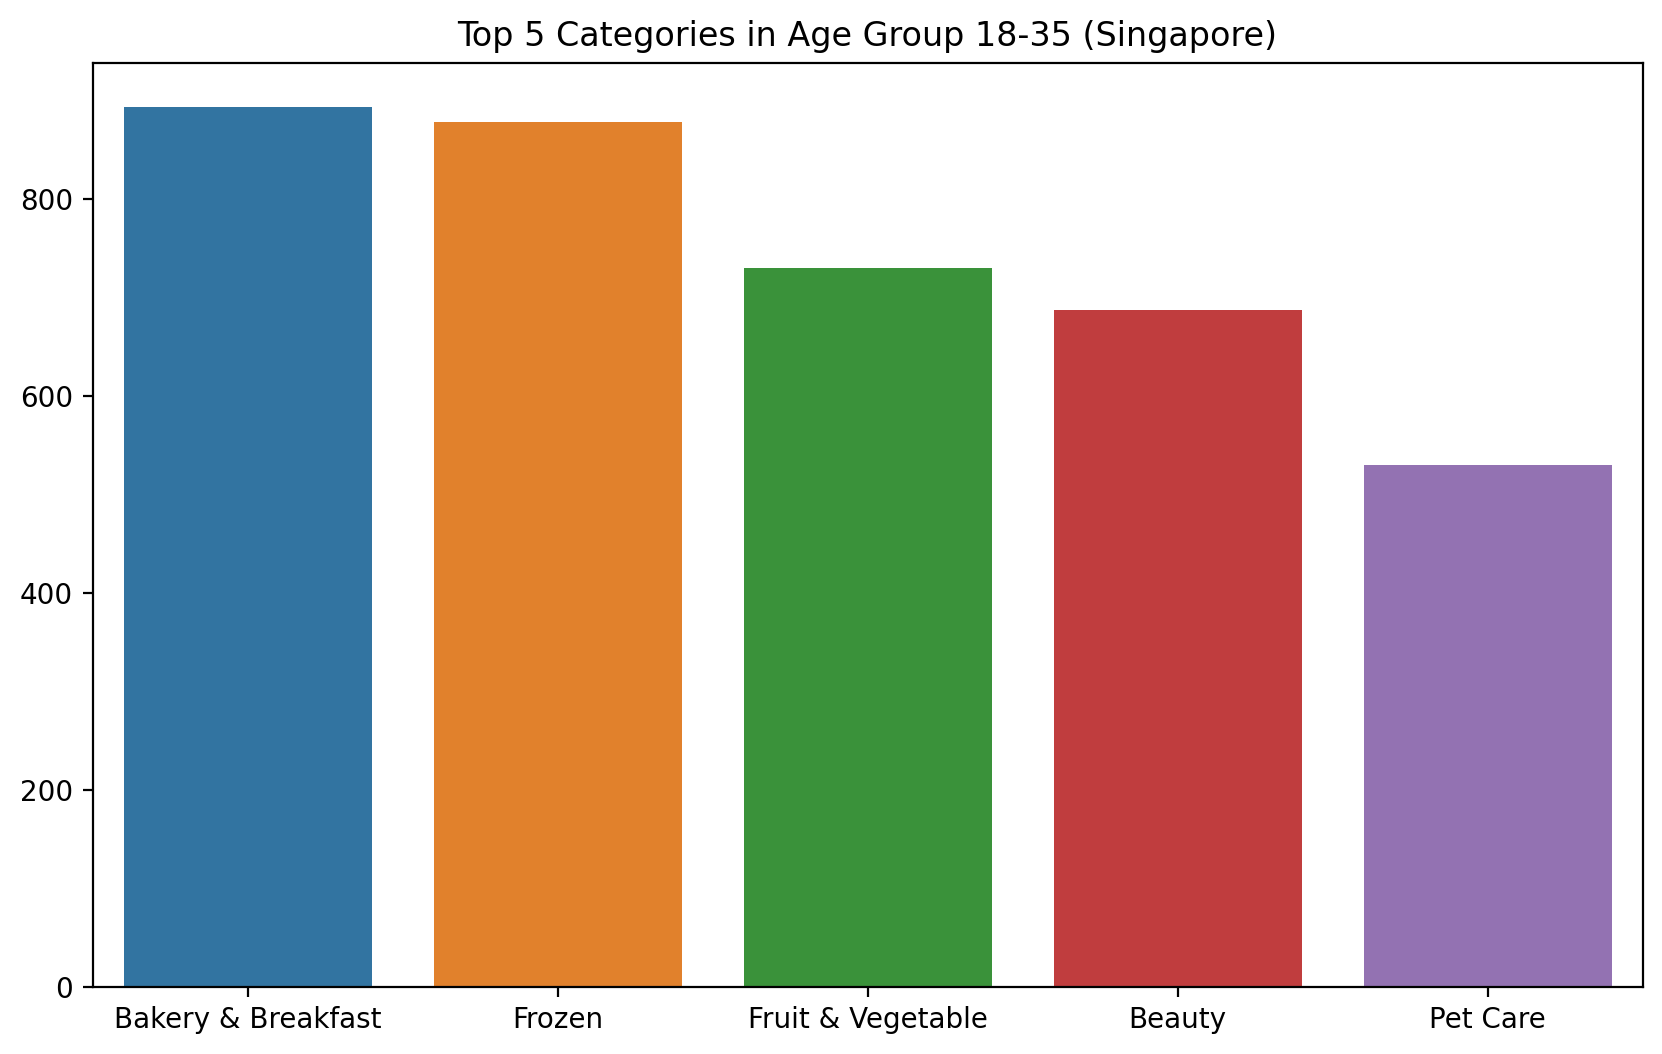

In [56]:
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(data=top_5_categories, x='Category', y='Receipt Number')
plt.ylabel(None)
plt.xlabel(None)
plt.title('Top 5 Categories in Age Group 18-35 (Singapore)');

**3.** Який топ 1 товар в кожній віковій категорії по країнах?

In [43]:
grouped_items = xl1.groupby(['Country', 'Age Group', 'Items'])['Receipt Number'].count().reset_index()

top_items = grouped_items.loc[grouped_items.groupby(['Country', 'Age Group'])['Receipt Number'].idxmax()]

top_items.pivot_table(index='Country', columns='Age Group', values='Items', aggfunc='first')

Age Group,15-18,18-35,35-45,45-65,65-75
Country,,,,,
Indonesia,PEDIGREE Adult complete nuritition dog food,Sainsbury salted tortilla chips,Sainsbury salted tortilla chips,Ashai Lager Beer,Ashai Lager Beer
Malaysia,Alpo Chicken pate dog food,Sainsbury salted tortilla chips,Sainsbury salted tortilla chips,Anchor salted pure butter,Anchor salted pure butter
Philippines,Sainsbury salted tortilla chips,Sainsbury salted tortilla chips,Sainsbury salted tortilla chips,Lamb pate dog food,Pore pack black
Singapore,Anchor salted pure butter,Sainsbury salted tortilla chips,Lamb pate dog food,Ashai Lager Beer,ThyGrace Holland potato


Особливо варто звернути увагу, що в усіх країнах найпопулярніший товар у віковій категорії 18-35 ʼSainsbury salted tortilla chipsʼ та в усіх країнах, окрім Сінгапуру, цей ж товар у віковій категорії 35-45. В Індонезії люди середнього та похилого віку найчастіше купують ʼAshai Lager Beerʼ, а в Малайзії - ʼAnchor salted pure butterʼ. 

**4.** Яким є розподіл продажів по країнах?

In [295]:
# Обираємо рядки з унікальними номерами замовлень для більш достовірного розподілу
unique_receipts = xl1.drop_duplicates(subset=['Receipt Number'], keep='first')

unique_receipts

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Age Group,Hour
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,35-45,10
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,45-65,15
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,15-18,11
8,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,0,20,Female,Jakarta,Indonesia,Pet Care,Dog Food & Trat,Lamb pate dog food,Nature's Gift,600 g,5.84,1,0.02,5.7232,21.1974,0.10,23.317140,Cash,BDO Unibank,0.148,0.15,0.702,0.86432,0.8760,4.09968,18-35,20
12,GIJ00005,2016-01-03,2016,1,15:47:23.141000,9873085193,MIDID0005,1,49,Male,Jakarta,Indonesia,Meat & Seafood,Fresh Meat,Hego Fresh chicken thigh,Hego,780 g,6.45,1,0.05,6.1275,6.1275,0.10,6.740250,Cash,Philippine National bank,0.088,0.15,0.762,0.56760,0.9675,4.91490,45-65,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50435,GSW01531,2019-12-28,2019,12,19:32:00.690000,9832560017,MIDSG0284,21,20,Male,Woodlands,Singapore,Beverages,coffee,Redmart coffee beans,Redmart,520 g,10.92,2,0.03,21.1848,21.1848,0.07,22.667736,Card,Philtrust Bank,0.073,0.15,0.777,1.59432,3.2760,16.96968,18-35,19
50436,GSW01532,2019-12-28,2019,12,10:19:30.769000,9865690417,MIDSG0518,13,35,Female,Woodlands,Singapore,Kitchen & Dining,BBQ Supplies,Kingsford BBQ charcoal,Kingsford,103 per pack,4.85,2,0.03,9.4090,9.4090,0.07,10.067630,Cash,ING Bank,0.109,0.15,0.741,1.05730,1.4550,7.18770,18-35,10
50437,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,15,28,Female,Woodlands,Singapore,Frozen,Frozen Vegetables,Sweet Corn,Erum,470 g,4.66,2,0.02,9.1336,74.1664,0.07,79.358048,Card,Philippine National bank,0.124,0.15,0.726,1.15568,1.3980,6.76632,18-35,20
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,Woodlands,Singapore,"Dairy, Chilled & Eggs",Deli & Cooked Meat,Straky Bacon,Citterio,240 g,5.44,2,0.03,10.5536,10.5536,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816,18-35,13


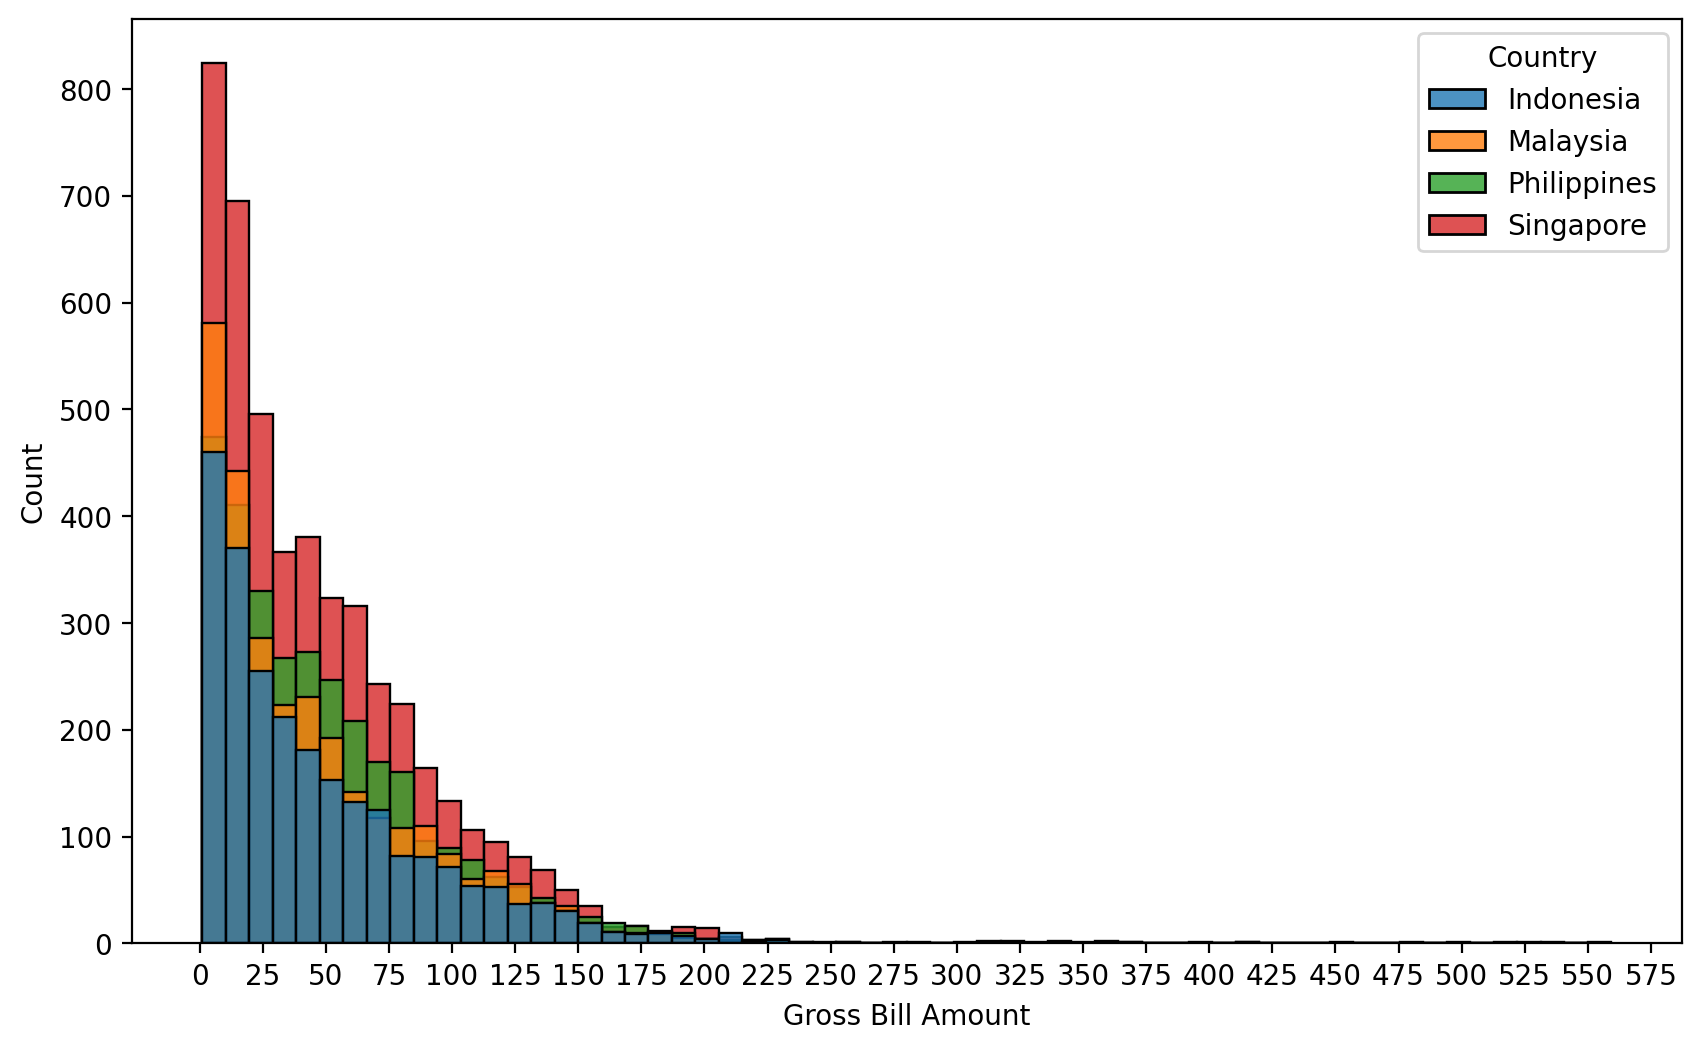

In [57]:
plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(x='Gross Bill Amount', data=unique_receipts, hue='Country', bins=60, alpha=0.8)
plt.xticks(np.arange(0, 600, 25));

Найбільший обсяг продажів спостерігається в Сінгапурі, а також варто звернути увагу на таку тенденцію, що найчастіше сума покупки становить близько 10 SGD та не перевищує 25 SGD.

**5.** Прибуток в якому місті Сінгапуру був більший: Bedok чи Woodlands?

In [6]:
singapore = xl1[(xl1['Country'] == 'Singapore')]

top_city = singapore.groupby('City')['Profit Margin'].agg(['sum', 'count', 'mean']).reset_index()

top_city

,City,sum,count,mean
0,Bedok,14649.59575,12272,1.193742
1,Woodlands,7489.29808,5924,1.264230


З одного боку, прибуток виявився більший саме в Bedok. Однак, якщо подивитися на середнє по прибутку, то воно більше саме в Woodlands. Тобто на майбутнє Woodlands є доволі перспективним для збільшення прибутку, якщо вдасться активізувати там продажі.

**6.** Хто робив покупки найчастіше: чоловіки чи жінки?

In [277]:
xl1.groupby('Gender')['Receipt Number'].nunique()

Gender
Female    10788
Male       2260
Name: Receipt Number, dtype: int64

Загалом жінки робили покупки набагато частіше за чоловіків. Дещо заглибившись можемо проаналізувати ці дані по вікових категоріях та країнах.

In [20]:
xl1.pivot_table(index='Gender', columns='Country', values='Receipt Number', aggfunc='nunique')

Country,Indonesia,Malaysia,Philippines,Singapore
Gender,,,,
Female,1950,2134,2391,4313
Male,469,702,703,386


Щодо жінок, то вони є найчастішими покупцями в Сінгапурі, а чоловіки - на Філіппінах.

In [21]:
xl1.pivot_table(index='Country', columns=['Age Group', 'Gender'], values='Receipt Number', aggfunc='nunique')

Age Group    15-18       18-35       35-45       45-65       65-75     
Gender      Female Male Female Male Female Male Female Male Female Male
Country                                                                
Indonesia      172   25    673  177    452   96    526  160     61   11
Malaysia       216  107   1007  282    394  138    431  135     60   25
Philippines    213   59    908  253    483  105    670  247     70   16
Singapore      373   24   1684  165    971   76   1096  103    111   16

Проте, якщо дивитися на чоловіків за цією таблицею з детальнішим розподілом, то можна помітити, що все-таки в більшості вікових категорій найчастішими покупцями є саме малазійці, філіппінці переважають лише в категорії 45-65.

**7.** В якій категорії жінки купували найбільше товарів?

In [45]:
female_data = xl1[xl1['Gender'] == 'Female']

grouped_categories = xl1.groupby(['Country', 'Age Group', 'Category'])['QTY'].sum().reset_index()

top_f_categories = grouped_categories.loc[grouped_categories.groupby(['Country', 'Age Group'])['QTY'].idxmax()]

top_f_categories.pivot_table(index='Country', columns='Age Group', values='Category', aggfunc='first')

Age Group,15-18,18-35,35-45,45-65,65-75
Country,,,,,
Indonesia,Bakery & Breakfast,Frozen,Frozen,Frozen,Frozen
Malaysia,Bakery & Breakfast,Bakery & Breakfast,Frozen,Bakery & Breakfast,Bakery & Breakfast
Philippines,Bakery & Breakfast,Bakery & Breakfast,Frozen,Bakery & Breakfast,Beauty
Singapore,Bakery & Breakfast,Bakery & Breakfast,Bakery & Breakfast,Bakery & Breakfast,Frozen


 - Загалом найбільше товарів жінки купували в категорії 'Bakery & Breakfast', далі йдуть заморожені продукти. 
 - Якщо в вікових категоріях 15-18, 18-35, 45-65 жінки купували більше саме випічку, то жінки віком 35-45 частіше обирали заморожені продукти.
 - Філіппінки літнього віку єдині, як не дивно, хто купував більше товарів саме в категорії ʼBeautyʼ.
 - Якщо пройтися по країнах, то індонезійки найбільше купували заморожені продукти, а жінки в решті країн - випічку.
 - Можна помітити, що жінки обирають вже приготовану їжу або ж таку, що готується швидко, адже скоріш за все більшість працюють, ще й ведуть господарство, тож на куховарство часу особливо не вистачає. 

**8.** Які топ 5 найприбутковіших категорій, підкатегорій, товарів, брендів?

In [49]:
profit_categories = xl1.groupby('Category')['Profit Margin'].sum().reset_index()

top_5_profcat = profit_categories.sort_values(by='Profit Margin', ascending=False).head(5)

top_5_profcat

,Category,Profit Margin
5,Frozen,9261.11848
1,Beauty,7989.95303
0,Bakery & Breakfast,6224.72130
13,Pet Care,4465.25015
6,Fruit & Vegetable,4388.17980


In [50]:
profit_subcategories = xl1.groupby('Sub_Category')['Profit Margin'].sum().reset_index()

top_5_profsub = profit_subcategories.sort_values(by='Profit Margin', ascending=False).head(5)

top_5_profsub

,Sub_Category,Profit Margin
34,Frozen Seafood,4682.09448
52,Oral Care,3659.47480
72,skin care,3304.07155
23,Dog Food & Trat,3246.56796
32,Frozen Fruits,2790.10479


In [58]:
profit_items = xl1.groupby('Items')['Profit Margin'].sum().reset_index()

top_5_profitems = profit_items.sort_values(by='Profit Margin', ascending=False).head(5)

top_5_profitems

,Items,Profit Margin
33,Ashai Lager Beer,1764.15428
72,Cascadian farm organic strawberries,1094.56347
20,Alpo Chicken pate dog food,995.04248
233,Lamb pate dog food,915.99124
161,Fresh Soyamilk,845.88239


In [11]:
xl1 = xl1.rename(columns={'Brand ': 'Brand'})

In [47]:
profit_brand = xl1.groupby('Brand')['Profit Margin'].sum().reset_index()

top_5_profbrand = profit_brand.sort_values(by='Profit Margin', ascending=False).head(5)

top_5_profbrand

,Brand,Profit Margin
17,Ashai,1764.15428
56,Cascadiam Farm,1215.07163
224,Nature's Gift,1121.38120
11,Alpo,1094.25288
38,BonJour,955.65339


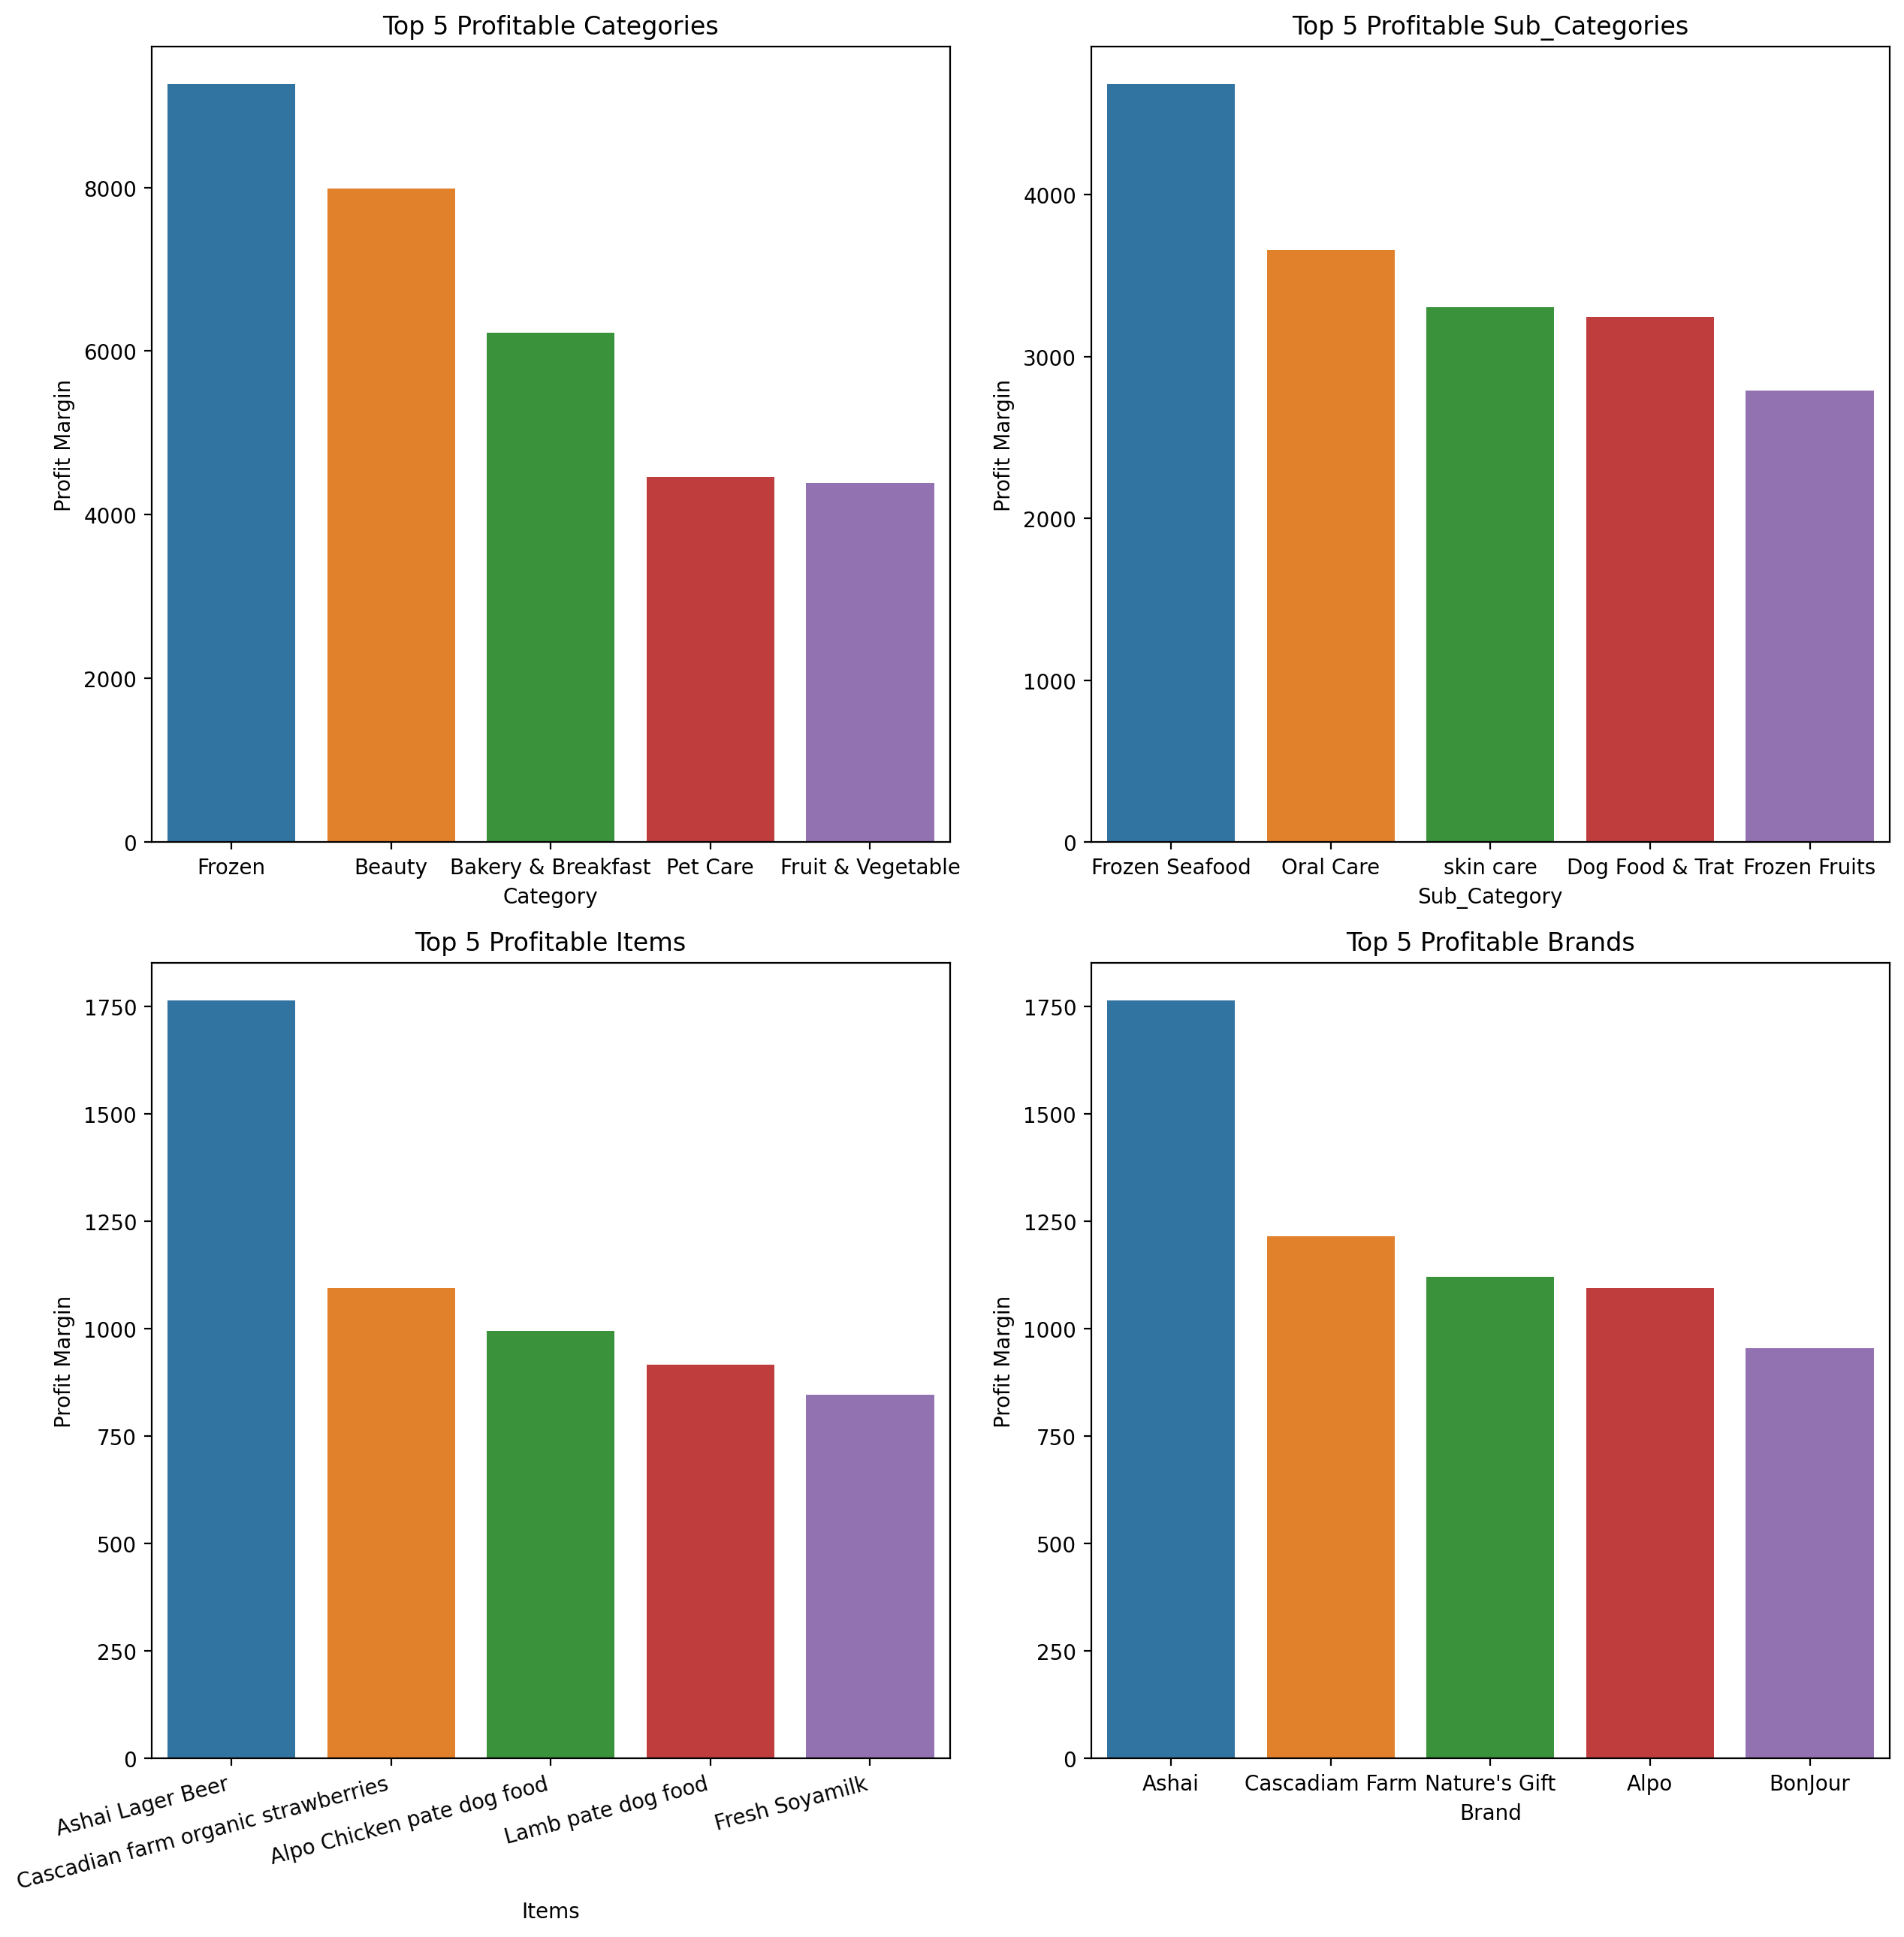

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(13, 13), dpi=200)

sns.barplot(x='Category', y='Profit Margin', data=top_5_profcat, ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Profitable Categories')

sns.barplot(x='Sub_Category', y='Profit Margin', data=top_5_profsub, ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Profitable Sub_Categories')

sns.barplot(x='Items', y='Profit Margin', data=top_5_profitems, ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Profitable Items')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15, ha='right')

sns.barplot(x='Brand', y='Profit Margin', data=top_5_profbrand, ax=axes[1, 1])
axes[1, 1].set_title('Top 5 Profitable Brands')

plt.tight_layout();

**9.** Які методи оплати застосовуються найчастіше в різних країнах, чоловіками/жінками, різними віковими категоріями?

In [220]:
xl1.groupby('Payment Mode')['Receipt Number'].nunique()

Payment Mode
Card      4407
Cash      4248
Wallet    4393
Name: Receipt Number, dtype: int64

Можна побачити, що найчастіше за покупки розплачуються за допомогою картки, хоча в цілому розкид не такий вже великий, тобто усіма засобами користуються доволі часто.

In [64]:
xl1.pivot_table(index='Payment Mode', columns='Gender', values='Receipt Number', aggfunc='nunique')

Gender,Female,Male
Payment Mode,,
Card,3574,833
Cash,3482,766
Wallet,3732,661


Цікаво що жінки частіше користуються саме електронним гаманцем, а чоловіки - карткою. Через те, що жінок-покупців набагато більше, то варто приділити особливу увагу розробці спеціальних пропозицій для володарок таких гаманців. 

In [225]:
xl1.pivot_table(index='Payment Mode', columns='Age Group', values='Receipt Number', aggfunc='nunique')

Age Group,15-18,18-35,35-45,45-65,65-75
Payment Mode,,,,,
Card,381,1756,1002,1106,82
Cash,498,1681,777,1034,167
Wallet,310,1712,936,1228,121


Підлітки та люди похилого віку розплачуються частіше за все готівкою, молоді люди карткою, а електронним гаманцем найчастіше користуються люди віком 45-65.

In [63]:
xl1.pivot_table(index='Payment Mode', columns='Country', values='Receipt Number', aggfunc='nunique')

Country,Indonesia,Malaysia,Philippines,Singapore
Payment Mode,,,,
Card,749,1002,1052,1604
Cash,875,821,1045,1507
Wallet,795,1013,997,1588


Найменш просунутою щодо сучасних методів оплати є Індонезія, адже тут найчастіше користуються готівкою, і цей факт варто брати до уваги при відкритті нових магазинів в цій країні. Малазійці найчастіше користуються електронним гаманцем. Філіппінці й сінгапурці - карткою.  

**10.** В який час найчастіше роблять покупки в кожній країні?

In [250]:
xl1['Hour'] = xl1['Time'].apply(lambda x: x.hour)

In [357]:
xl1.groupby('Hour')['Receipt Number'].nunique()

Hour
10    1109
11    1049
12    1106
13    1153
14    1075
15    1112
16    1088
17    1071
18    1099
19    1123
20    1154
21    1123
Name: Receipt Number, dtype: int64

Якщо дивитися загалом, то найчастіше покупки робили о 20 годині.

In [314]:
hour_country = xl1.pivot_table(index='Hour', columns='Country', values='Receipt Number', aggfunc='nunique')

hour_country

Country,Indonesia,Malaysia,Philippines,Singapore
Hour,,,,
10,221,268,227,393
11,200,241,239,369
12,218,228,249,411
13,213,272,256,412
14,186,224,232,433
15,218,234,280,380
16,188,239,276,385
17,191,222,259,399
18,193,229,280,397


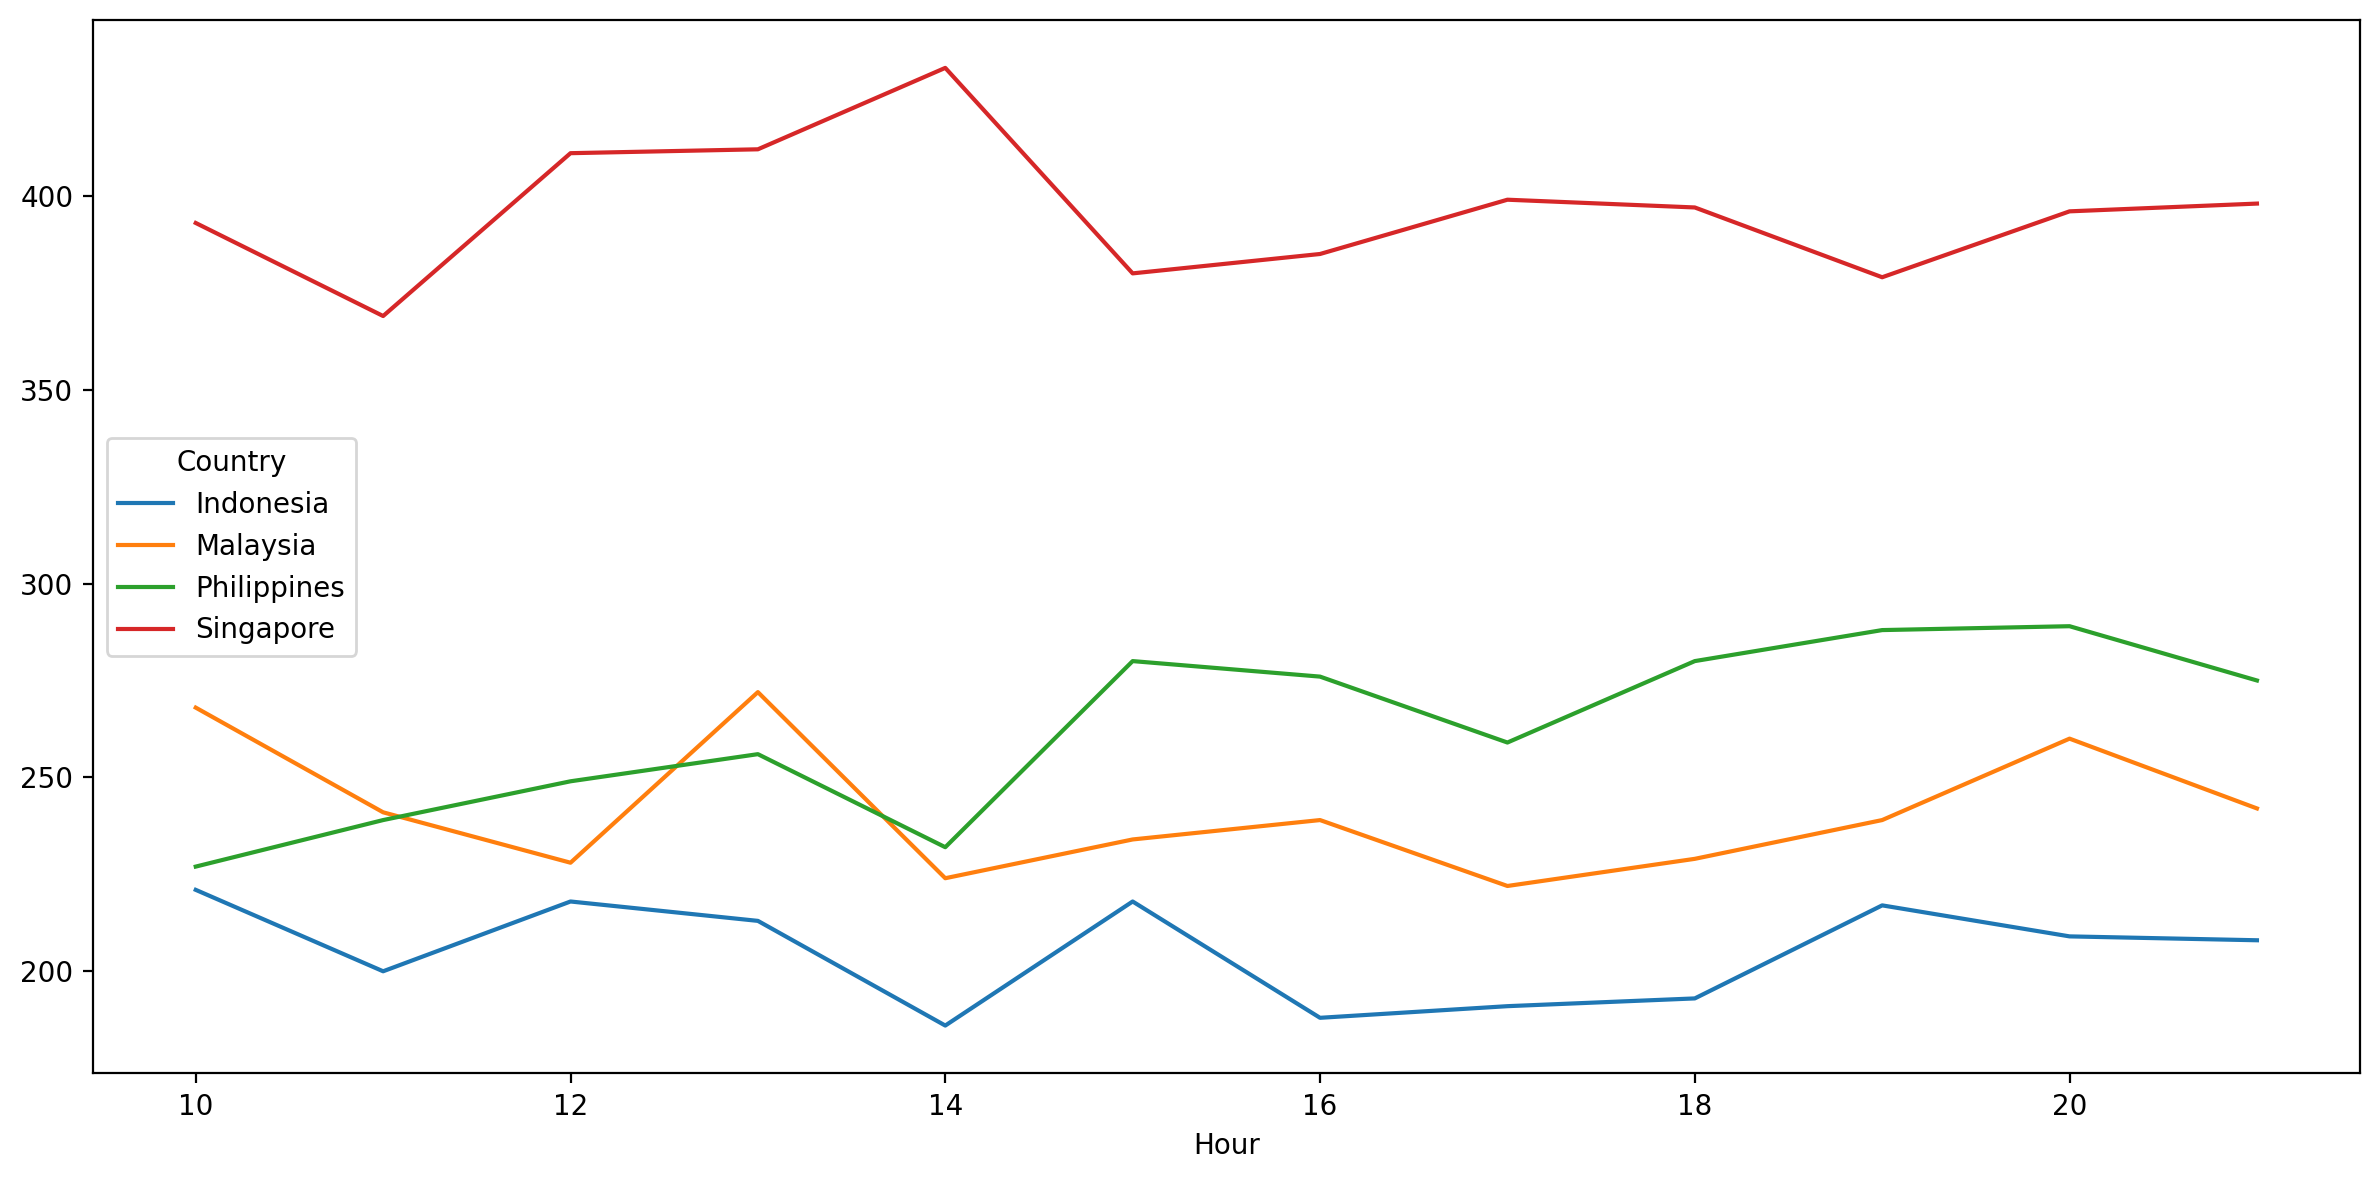

In [351]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
hour_country.plot(ax=ax)
plt.tight_layout();

 Проте, якщо дивитися по країнах, то ситуація дещо інша, а саме, в Сінгапурі й Малайзії найчастіше купували в обідній час, в Індонезії - зранку, а на Філіппінах - ввечері. Таким чином, кожна країна має свої особливості щодо поведінки покупців, на що варто звертати увагу при побудові стратегії розвитку й розширення в різних країнах.

**11.** В який місяць 2019 року та в які дні цього місяця був найбільший прибуток для магазинів в Сінгапурі?

In [35]:
countries_2019 = xl1[(xl1['Year'] == 2019)]

In [61]:
pivot_countries_19 = countries_2019.pivot_table(index='Month', columns='Country', values='Profit Margin', aggfunc='sum')

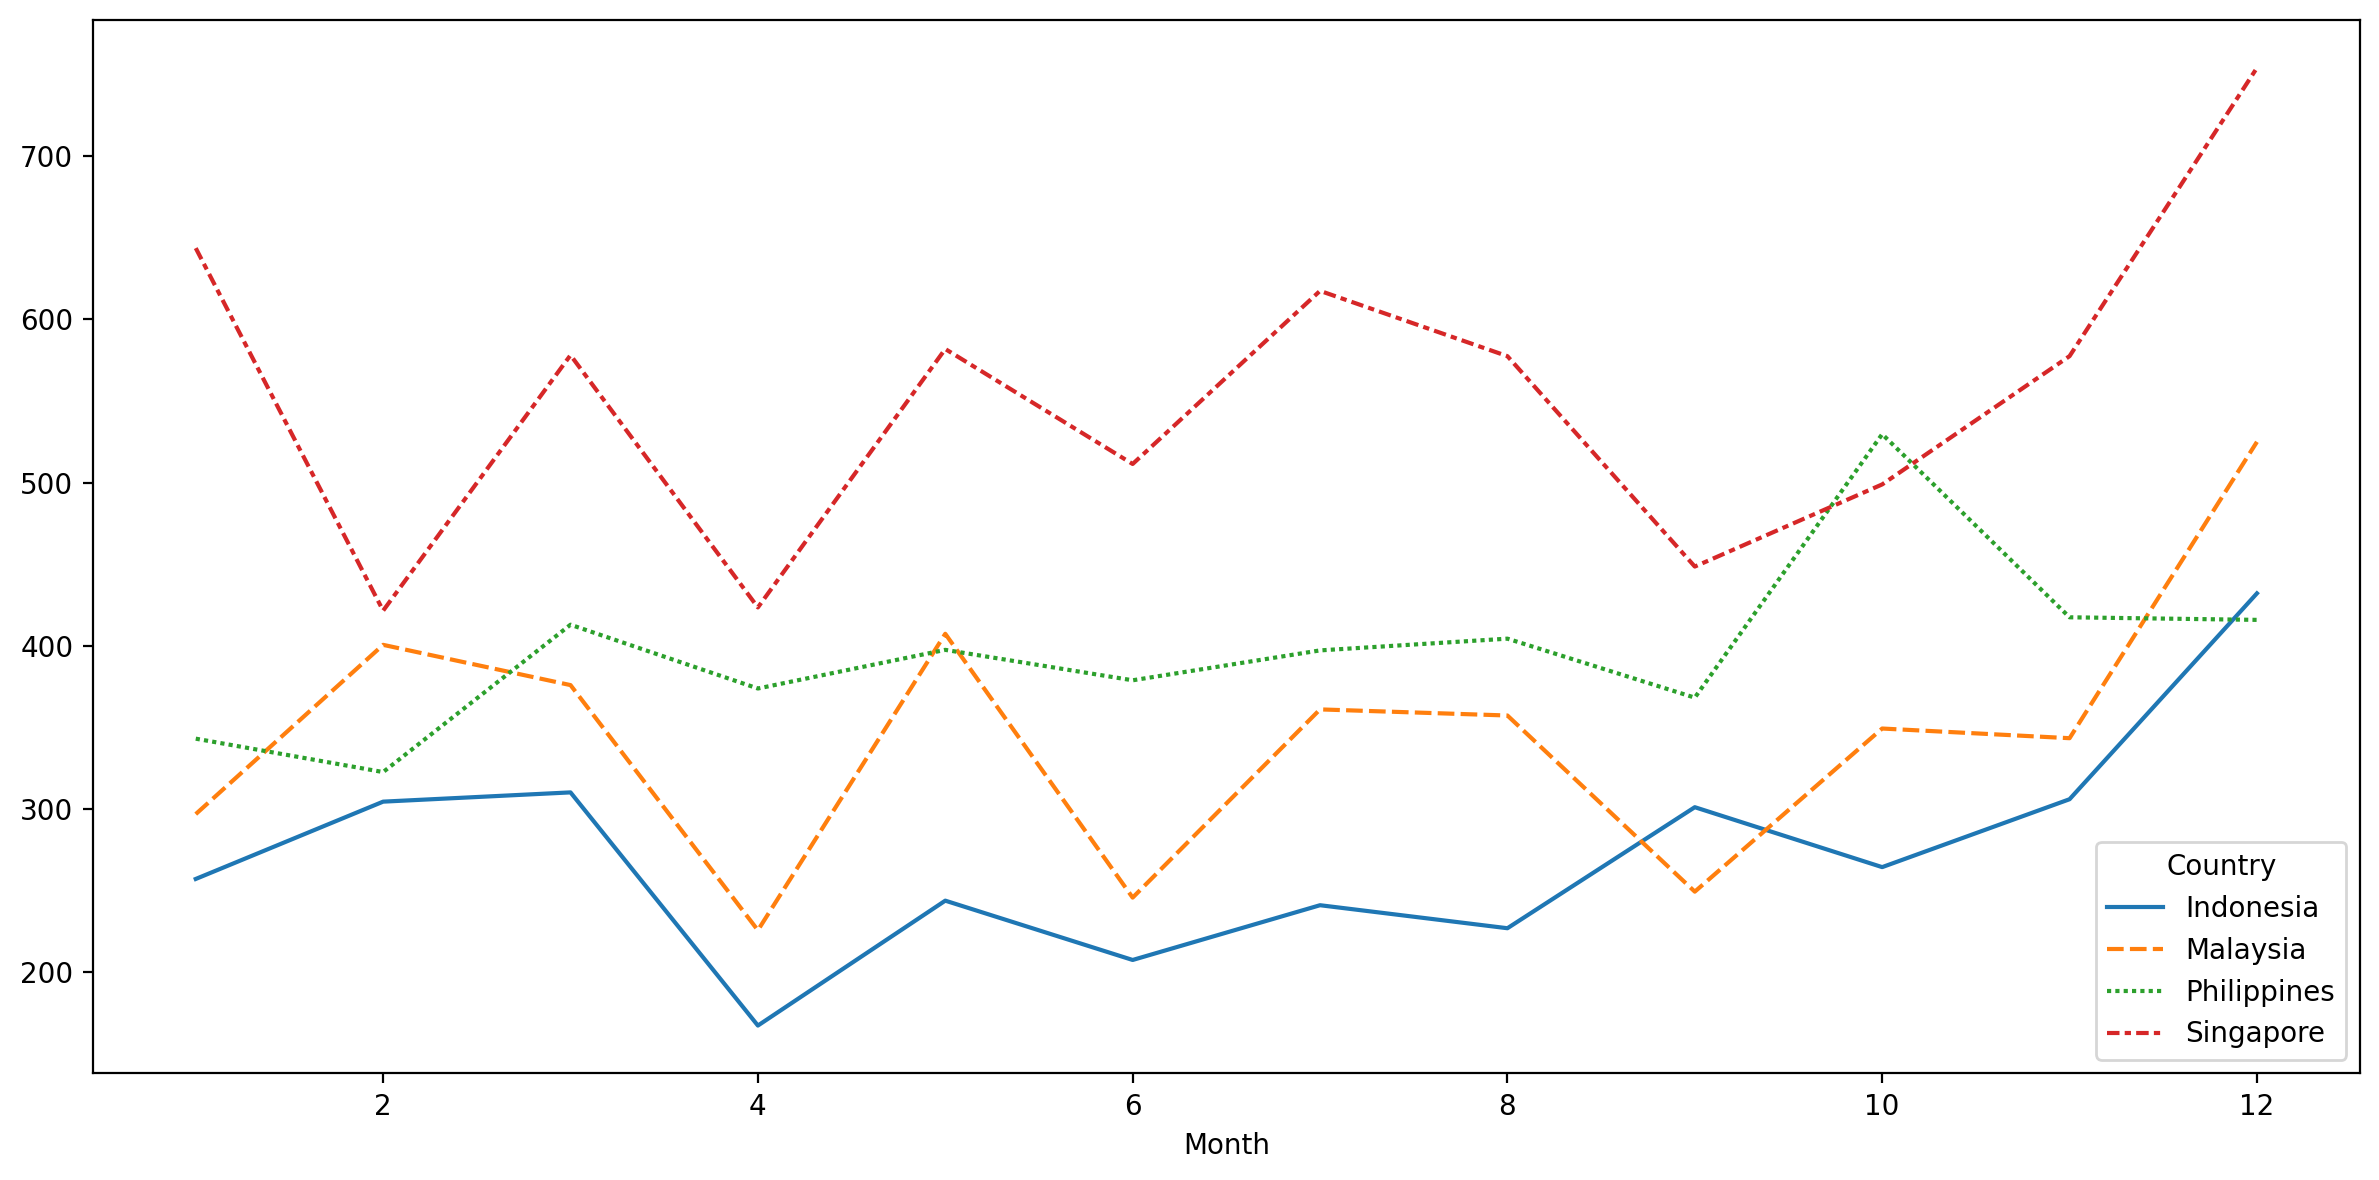

In [62]:
plt.figure(figsize=(12, 6), dpi=200)
sns.lineplot(data=pivot_countries_19)
plt.tight_layout();

На графіку чітко видно, що найбільший прибуток в Сінгапурі, як і в Малайзії та Індонезії, був у грудні. Лише на Філіппінах найприбутковішим місяцем виявився жовтень.

In [45]:
singapore_2019_12 = countries_2019[(countries_2019['Month'] == 12) & (countries_2019['Country'] == 'Singapore')]

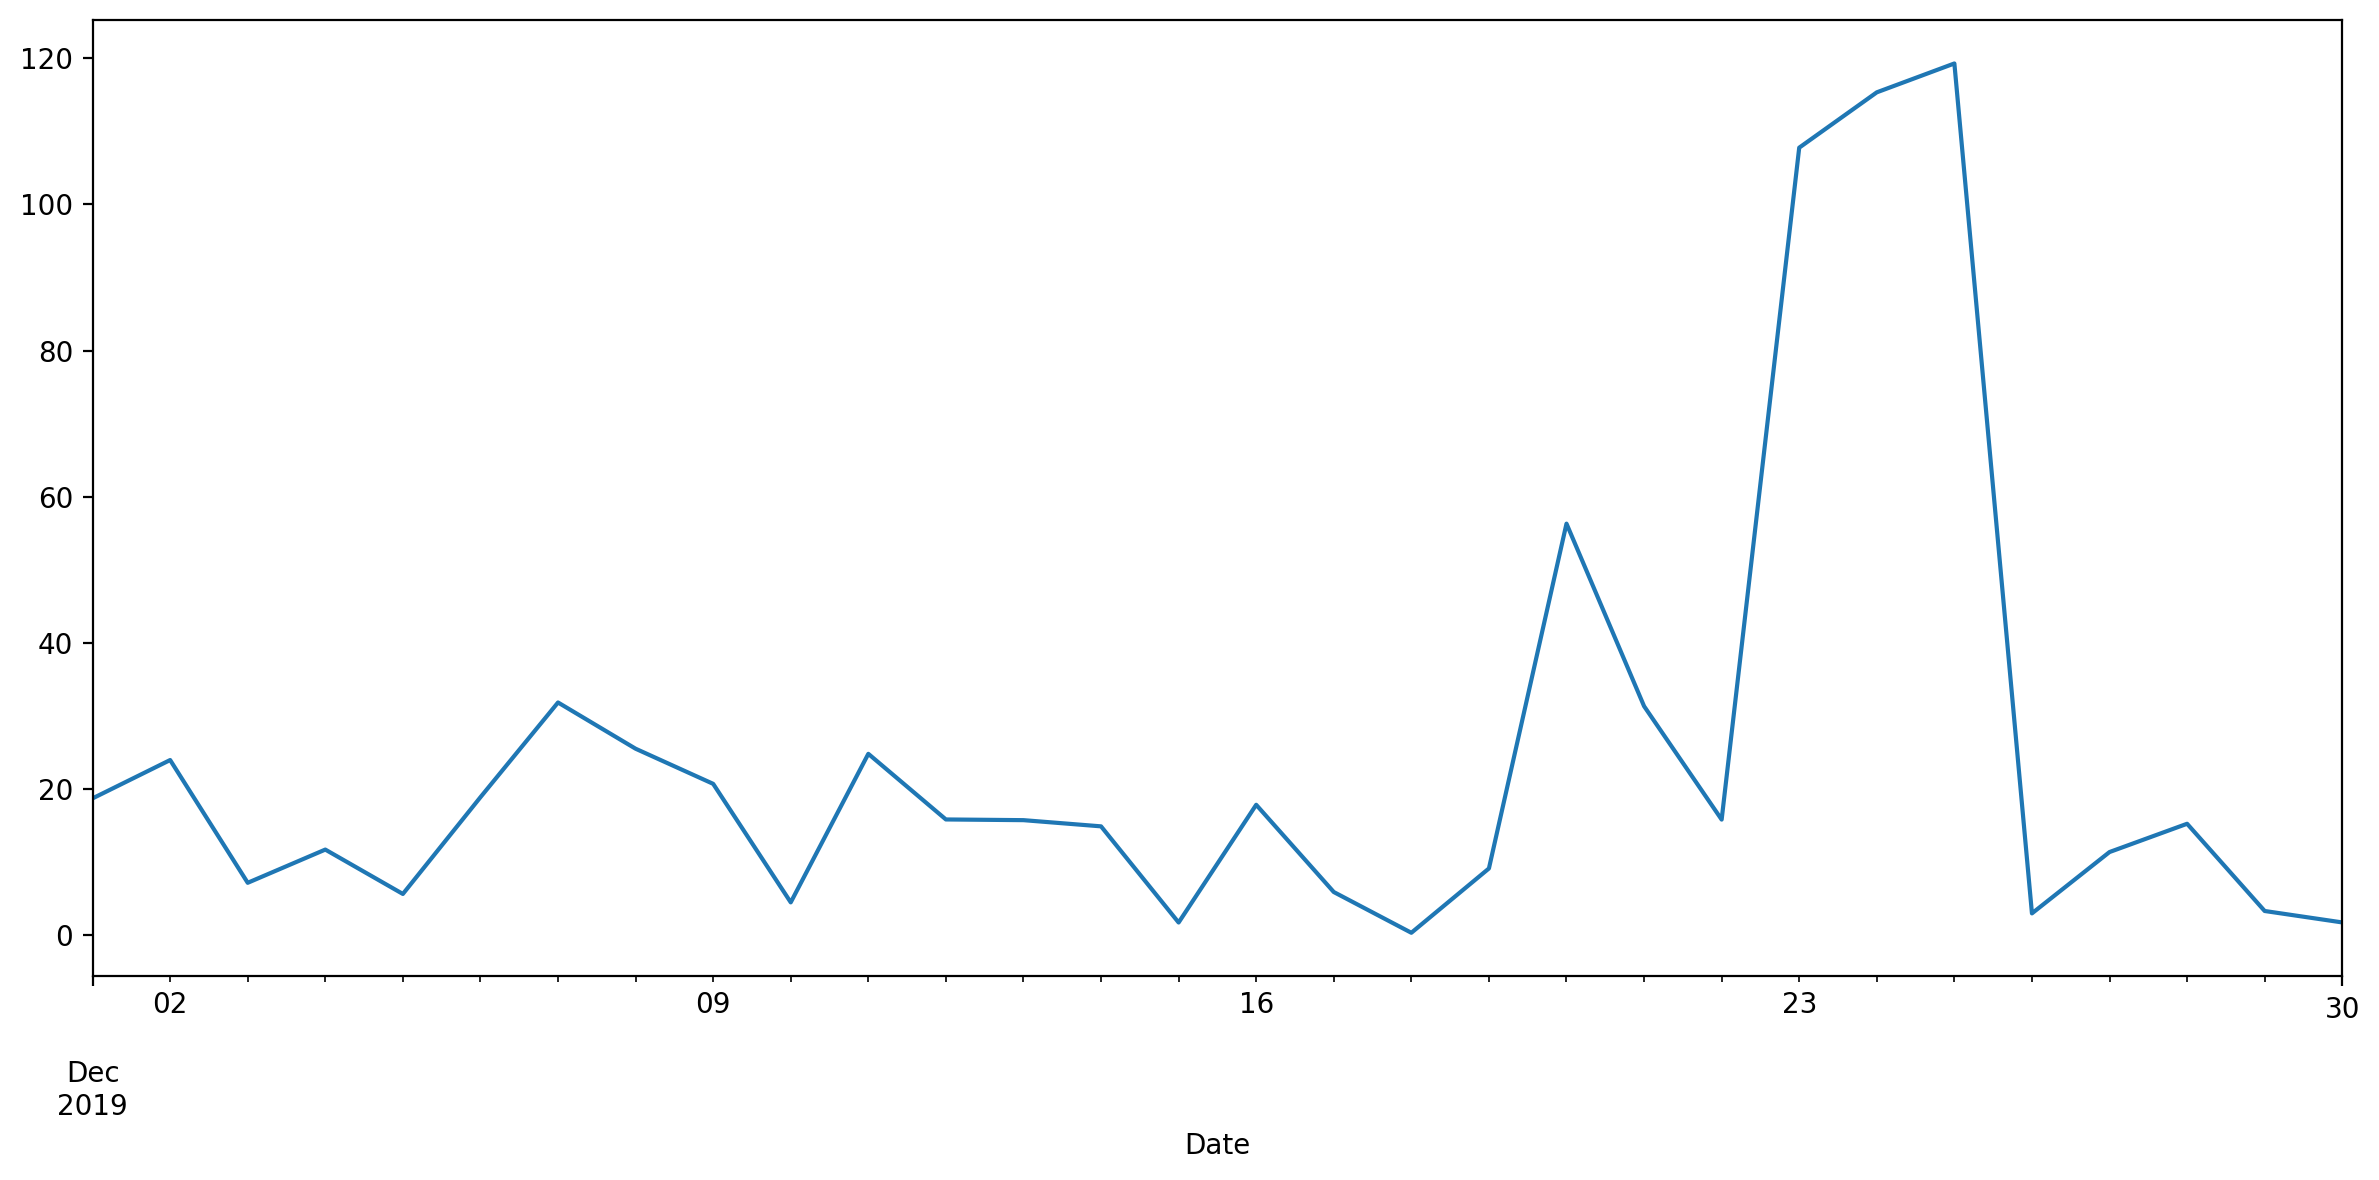

In [46]:
plt.figure(figsize=(12, 6), dpi=200)
singapore_2019_12.groupby(singapore_2019_12['Date'])['Profit Margin'].sum().plot()
plt.tight_layout();

На графіку видно, що найбільший прибуток в Сінгапурі був з 23 по 25 грудня 2019. Сінгапурці люблять святкувати Різдво, тож не дивно, що саме цей місяць і саме ці дні є найприбутковішими для магазинів в цій країні.